In [1]:
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [3]:
b = np.empty((len(a),2))*np.nan
b[1,1]=1.0
b

array([[nan, nan],
       [nan,  1.],
       [nan, nan]])

In [9]:
N = 8
n_particles1 = np.logspace(1, N, N, dtype=int)
#n_particles = np.array([1e6, 1e7, 1e8])
n_quadrupoles1 = 5
n_slices1 = 1
n_particles1

array([       10,       100,      1000,     10000,    100000,   1000000,
        10000000, 100000000])

In [10]:
scalene = '/global/common/software/m669/jpga/conda/envs/phase_space_reconstruction/bin/scalene'

In [11]:
n_samples = 5
memory1 = np.empty((len(n_particles1), n_samples))*np.nan
memory1_nograd = memory1.copy()

for i, n_par in enumerate(n_particles1):
    print(i)
    for j in range(n_samples):
        os.system(scalene + " --json --memory --outfile profile.json /global/homes/j/jpga/Repositories/Bmad-X/dev/torch_module_profiling/torch_module_profiling.py "
                  + str(n_par) + " " + str(n_quadrupoles1) + " " + str(n_slices1))
        f = open('profile.json')
        try:
            lines = json.load(f)['files']['/global/homes/j/jpga/Repositories/Bmad-X/dev/torch_module_profiling/torch_module_profiling.py']['lines']
            for line in lines:
                if line['lineno'] == 39:
                    memory1[i,j] = line['n_peak_mb']
        except:
            pass
        os.system(scalene + " --json --memory --outfile profile.json /global/homes/j/jpga/Repositories/Bmad-X/dev/torch_module_profiling/torch_module_profiling_no_grad.py "
                  + str(n_par) + " " + str(n_quadrupoles1) + " " + str(n_slices1))
        f = open('profile.json')
        try:
            lines = json.load(f)['files']['/global/homes/j/jpga/Repositories/Bmad-X/dev/torch_module_profiling/torch_module_profiling_no_grad.py']['lines']
            for line in lines:
                if line['lineno'] == 39:
                    memory1_nograd[i,j] = line['n_peak_mb']
        except:
            pass

0
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
1
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not run for long enough to profile.
Scalene: Program did not ru

In [12]:
memory1, memory1_nograd

(array([[           nan,            nan,            nan,            nan,
                    nan],
        [           nan,            nan,            nan,            nan,
                    nan],
        [           nan,            nan,            nan,            nan,
                    nan],
        [           nan,            nan,            nan, 2.00413980e+01,
                    nan],
        [1.33914696e+02, 1.33524453e+02, 1.23530365e+02, 1.33503456e+02,
         1.33520889e+02],
        [1.38171951e+03, 1.28628183e+03, 1.37797918e+03, 1.40467816e+03,
         1.28628086e+03],
        [1.37723680e+04, 1.38486655e+04, 1.33909050e+04, 1.29330460e+04,
         1.33908722e+04],
        [1.41145825e+05, 1.37712566e+05, 1.38475472e+05, 1.41908798e+05,
         1.38475473e+05]]),
 array([[           nan,            nan,            nan,            nan,
                    nan],
        [           nan,            nan,            nan,            nan,
                    nan],
        

In [13]:
np.mean(memory1, axis=1),np.mean(memory1_nograd, axis=1)

(array([           nan,            nan,            nan,            nan,
        1.31598772e+02, 1.34738791e+03, 1.34671713e+04, 1.39543627e+05]),
 array([           nan,            nan,            nan,            nan,
                   nan,   197.33708744,  1777.81377811, 22735.91836414]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


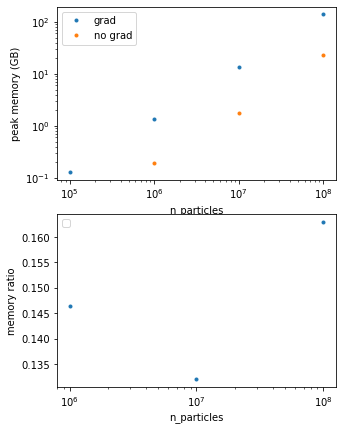

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(5,7))
ax[0].plot(n_particles1, 1e-3*np.mean(memory1, axis=1), '.', label='grad')
ax[0].plot(n_particles1, 1e-3*np.mean(memory1_nograd, axis=1), '.', label='no grad')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('n_particles')
ax[0].set_ylabel('peak memory (GB)')
ax[0].legend()
ax[1].plot(n_particles1, np.mean(memory1_nograd, axis=1)/np.mean(memory1, axis=1), '.',color=colors[0])
#ax[1].plot(n_particles1, np.mean(memory1_nograd, axis=1), '.',color=colors[1], label='no grad')
ax[1].set_xscale('log')
ax[1].set_xlabel('n_particles')
ax[1].set_ylabel('memory ratio')
 search0Di

In [ ]:
n_particles2 = 10_000
n_slices2 = 1
n_quadrupoles2 = np.linspace(10, 100, 10, dtype=int)
n_quadrupoles2

In [ ]:
memory2 = np.full_like(n_quadrupoles2, np.nan, dtype=np.double)
memory2_nograd = memory2.copy()

for i, n_quads in enumerate(n_quadrupoles2):
    os.system("scalene --memory ./torch_module_profiling.py "
              + str(n_particles2) + " " + str(n_quads) + " " + str(n_slices2) )
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            memory2[i] = line['n_peak_mb']
    os.system("scalene --memory ./torch_module_profiling_no_grad.py "
              + str(n_particles2) + " " + str(n_quads) + " " + str(n_slices2) )
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling_no_grad.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            memory2_nograd[i] = line['n_peak_mb']

In [ ]:
memory2, memory2_nograd

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(n_quadrupoles2, np.array(memory2), '.', color=colors[0], label='grad')
ax.tick_params(axis="y", labelcolor=colors[0])
ax2.plot(n_quadrupoles2, np.array(memory2_nograd), '.',color=colors[1], label='no grad')
ax2.tick_params(axis="y", labelcolor=colors[1])
ax.set_xlabel('n_quadrupoles')
ax.set_ylabel('peak memory (MB)')
fig.legend()

In [ ]:
n_particles3 = 10_000
n_quadrupoles3 = 1
n_slices3 = np.linspace(1,10,10, dtype=int)
n_slices3

In [ ]:
memory3 = np.full_like(n_slices3, np.nan, dtype=np.double)
memory3_nograd = memory2.copy()

for i, n_sl in enumerate(n_slices3):
    os.system("scalene --memory ./torch_module_profiling.py "
              + str(n_particles3) + " " + str(n_quadrupoles3) + " " + str(n_sl) )
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            memory3[i] = line['n_peak_mb']
            os.system("scalene --memory ./torch_module_profiling_no_grad.py "
              + str(n_particles3) + " " + str(n_quadrupoles3) + " " + str(n_sl) )
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling_no_grad.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            memory3_nograd[i] = line['n_peak_mb']

In [ ]:
memory3, memory3_nograd

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(n_slices3, np.array(memory3), '.', color=colors[0], label='grad')
ax.tick_params(axis="y", labelcolor=colors[0])
ax2.plot(n_slices3, np.array(memory3_nograd), '.', color=colors[1], label='no grad')
ax2.tick_params(axis="y", labelcolor=colors[1])
ax.set_xlabel('n_steps')
ax.set_ylabel('peak memory (MB)')
ax.legend()